 # Explorotary Data Analysis

> TED is a nonprofit organization; their mission is to spread ideas. Founded in 1984 as a conference about Technology, Entertainment and Design, today it covers most of topics from science to business to global issues. I came to know about TED from YouTube when searching for motivational videos. Really amazed by Simon Sinek's talk on 'How great leaders inspires action', then one after other I became huge fan of TED talks. Varied topics, varied speakers and varied ideas made each and every talk unique in TED.


> My amusement towards TED talk made me to choose to dive in TED data to analyze further. For this analysis I am going to consider __[TED talk dataset](https://www.kaggle.com/rounakbanik/ted-talks)__ and __[YouTube TED dataset](https://www.kaggle.com/goweiting/ted-talks-transcript/data)__ both from Kaggle. Hope we will find lot of insights worth spreading!!!


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv("data1.csv")

In [3]:
top10_ted_views = data1.sort_values(by = 'ted_views',ascending=False).head(10)
top10_you_views = data1.sort_values(by = 'youtube_views',ascending=False).head(10)

## TED Title Winners

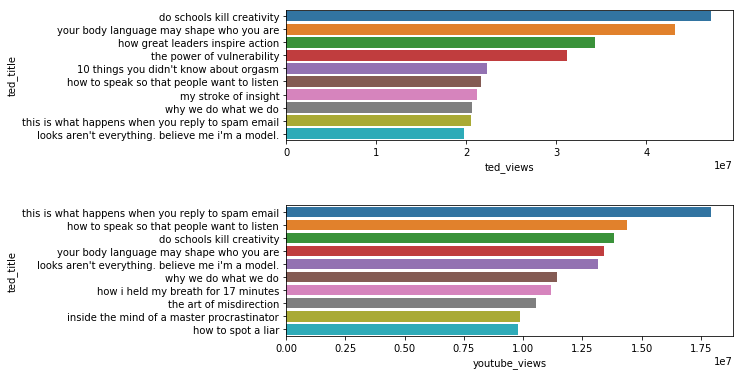

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6),ncols=1,nrows=2)
plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 2)


sns.barplot(x='ted_views',y='ted_title',data=top10_ted_views,ax = ax[0])

#plt.xlabel('TED Views')
#plt.ylabel('TED Talk')

sns.barplot(x='youtube_views',y='ted_title',data=top10_you_views,ax=ax[1])
#plt.xlabel('YouTube Views')
#plt.ylabel('TED Talk')
#fig.set_xtickslabel(['TED Views','YouTube Views'])


> The above plot give us the top viewed TED talks in TED.com and Youtube.<br>
*  Interestingly the ranking orders are not same in both websites(YouTube and TED).Also the number of views also differs
*  Six talks from top TED views are also listed in top Youtube Views category. So those talks are clear winners.
*  But the number of views clearly represents the mission of TED __'Ideas Worth Spreading'__

## Best Speakers

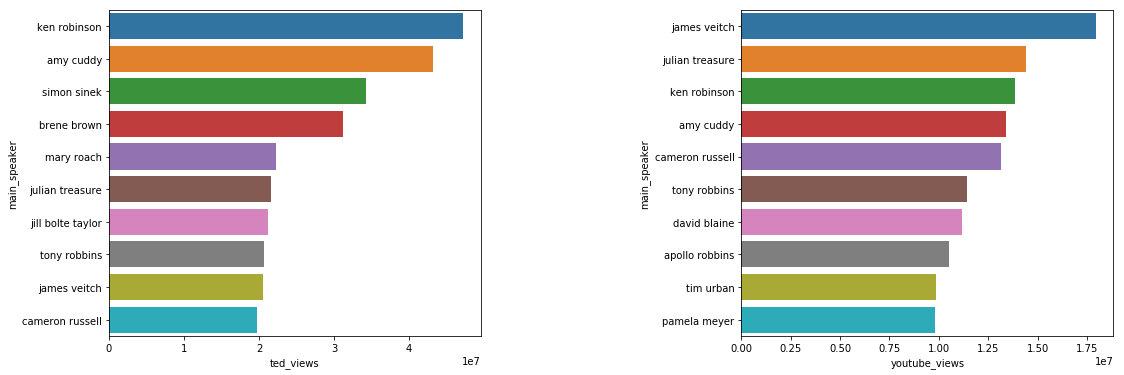

In [5]:
fig, ax = plt.subplots(figsize=(18, 6),ncols=2,nrows=1)
plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 0.7)


g = sns.barplot(x='ted_views',y='main_speaker',data=top10_ted_views,ax = ax[0])
#g.set_xlim(0,50000000)
sns.barplot(x='youtube_views',y='main_speaker',data=top10_you_views,ax=ax[1])


> TED Speakers are equally popular as TED Talks.
*  __Ken Robinson,Amy Cuddy,Simon Sinek,Julian Treasure,James Veitch and Cameron Russell__ are top speakers in both TED.com and YouTube.
*  But the order differs greatly in YouTube. James Veitch's 'this is what happens when reply to spam email' is mainly attract all the category of people throughout the world as this may be also the question searched on YouTube, that gives edge.

## Impact of TED Talk 

In [6]:
import ast
df_list=[]

for index,row in data1.iterrows():
    ratings_list = ast.literal_eval(row.ted_ratings)
    ratings_df = pd.DataFrame(ratings_list)
    ratings_df['title']=row.ted_title
    df_list.append(ratings_df)
    
ratings = pd.concat(df_list,axis=0)
ratings.reset_index(drop=True,inplace=True)
ratings = ratings.rename(columns={'name':'Expression','count':'Votes','title':'Talk'})

Expression_Count = ratings.groupby('Expression')['Votes'].agg(['sum']).sort_values('sum',ascending=False)
Expression_Count = Expression_Count.reset_index()

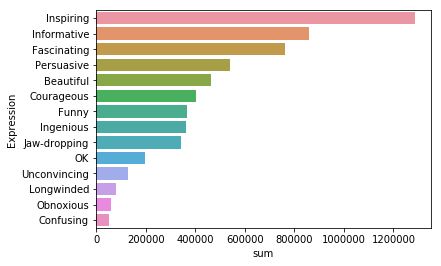

In [7]:
sns.barplot(y='Expression',x='sum',data=Expression_Count)

> TED allows viewers to rate the talk not by numbers but by words. Viewers are allow to choose three words to express their response to talk. Above plot gives us the top words chosen by users to rate the videos.
*  It seems most of the viewers wants the talk to be __Inspiring__
*  There is also clear border between the positive and negative expressions. As __OK,Unconvincing,Longwinded,Obnoxious,Confusing__ are not kind of good comments are only in lesser numbers compared to positive comments.
*  By above two points most of the TED talks are __best__, also people are not willing to express their negative feedback.

## Exploring Categories

In [8]:
###TED TAGS

import ast
df2_list=[]

for index,row in data1.iterrows():
    tag_list = ast.literal_eval(row.ted_tags)
    tags_df = pd.DataFrame(tag_list)
    tags_df['title']=row.ted_title
    df2_list.append(tags_df)

    
tags = pd.concat(df2_list,axis=0)
tags.reset_index(drop=True,inplace=True)
tags = tags.rename(columns={0:'tags','title':'title_tags'})

tag_merge  = pd.merge(data1,tags,left_on='ted_title',right_on='title_tags')
t = (tags.groupby('tags')['title_tags'].count().sort_values(ascending=False).head(10)).to_frame().reset_index()


##YouTube Categories
categories_count = data1.groupby('youtube_categories')['ted_title'].agg(['count']).sort_values('count',ascending=False)
categories_count.reset_index(inplace=True)

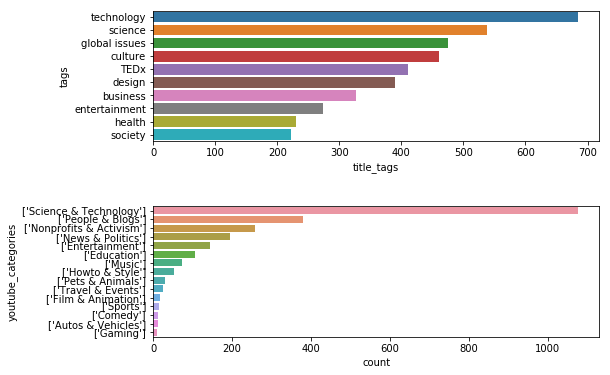

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6),ncols=1,nrows=2)
plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 2)


sns.barplot(y='tags',x='title_tags',data=t,ax=ax[0])
sns.barplot(x='count',y='youtube_categories',data=categories_count,ax=ax[1])

> TED segregated their videos based on tags and YouTube based on Categories.
*  No of Talks tagged as Technology and Science are large numbers,same as in Science and Technology Categories.
*  TED organises more talks in Science & Technology and Global issues 

## Best Category

In [10]:
y = data1[['ted_title','youtube_categories','youtube_views']][data1.youtube_views > 104896].sort_values('youtube_views',ascending=False).head(100)
y.groupby('youtube_categories')['ted_title'].count()

youtube_categories
['Comedy']                    5
['Education']                 7
['Entertainment']            10
['Film & Animation']          1
['Gaming']                    1
['Howto & Style']             4
['Music']                     6
['News & Politics']           4
['Nonprofits & Activism']     3
['People & Blogs']           28
['Science & Technology']     30
['Sports']                    1
Name: ted_title, dtype: int64

> Thought the count of Science and Technology talks are high,when considering top YouTube views __People & Blogs and Entertainment__ categories have more number of talks in the top viewed videos.

## Diverse Occupation of speakers

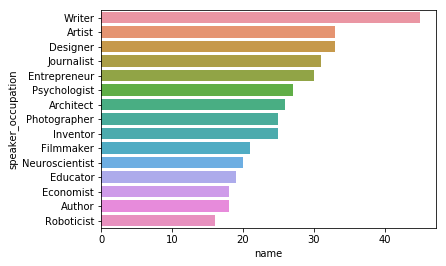

In [11]:
sp_op = (data1.groupby('speaker_occupation')['name'].count().sort_values(ascending = False).head(15)).to_frame().reset_index()
sns.barplot(y='speaker_occupation',x='name',data=sp_op)

> __Writers__ performed most of the Talks in TED events. As writers are the best with words also known for their charming ways to attract readers they topped the list.

## Viewers willingness to comment

In [12]:
Total_ratings =ratings.groupby('Talk')['Votes'].agg(['sum'])

Total_ratings.reset_index(inplace=True)
Total_ratings = Total_ratings.rename(columns={'sum':'Ted_nof_ratings'})

data1['youtube_total_ratings'] = data1['youtube_likes']+data1['youtube_dislikes']
data1 = pd.merge(data1,Total_ratings,left_on='ted_title',right_on='Talk')

ratings_stat = data1[['ted_title','ted_views','Ted_nof_ratings','ted_nof_comments','youtube_views','youtube_likes','youtube_dislikes','youtube_total_ratings']]
ratings_stat['ted_ratio']=ratings_stat['Ted_nof_ratings']/ratings_stat['ted_views']
ratings_stat['youtube_ratio']=ratings_stat['youtube_total_ratings']/ratings_stat['youtube_views']

ratings_stat.sort_values(by=['ted_ratio','youtube_ratio'],ascending=False).head(5)

C:\Users\Sivakumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Sivakumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,ted_title,ted_views,Ted_nof_ratings,ted_nof_comments,youtube_views,youtube_likes,youtube_dislikes,youtube_total_ratings,ted_ratio,youtube_ratio
567,building a park in the sky,704205,8023,92,53078,985.0,11.0,996.0,0.011393,0.018765
519,transplant cells not organs,620231,6859,273,54684,631.0,15.0,646.0,0.011059,0.011813
1624,why gun violence can't be our new normal,1096198,10251,335,70928,1899.0,1073.0,2972.0,0.009351,0.041902
2191,i believe we evolved from aquatic apes,1038576,6680,621,122793,1937.0,169.0,2106.0,0.006432,0.017151
763,from stigma to supermodel,166959,903,59,9092,97.0,1.0,98.0,0.005409,0.010779


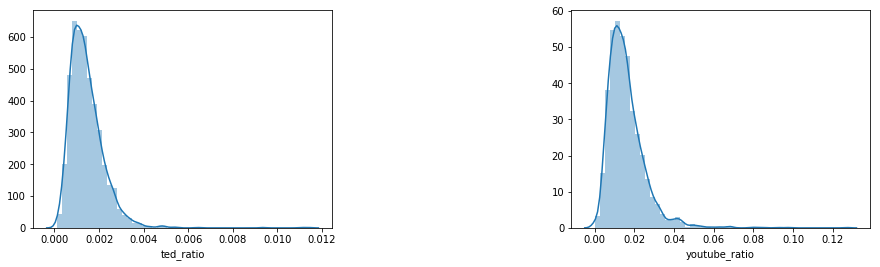

In [13]:
fig, ax = plt.subplots(figsize=(15, 4),ncols=2,nrows=1)
plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 0.8)

sns.distplot(ratings_stat.ted_ratio,ax=ax[0])
sns.distplot(ratings_stat.youtube_ratio,ax=ax[1])

> Though the count of views in TED.com and YouTube touches millions, but the number of people ready to comment or rate is very less.
*  From above plots No of people commented vs Total views in __TED.com is only 0.2 % whereas YouTube is 2%__
*  More comments from people will give the clear picture on the feedback of the Talks.

## Numbers speaks Correlation

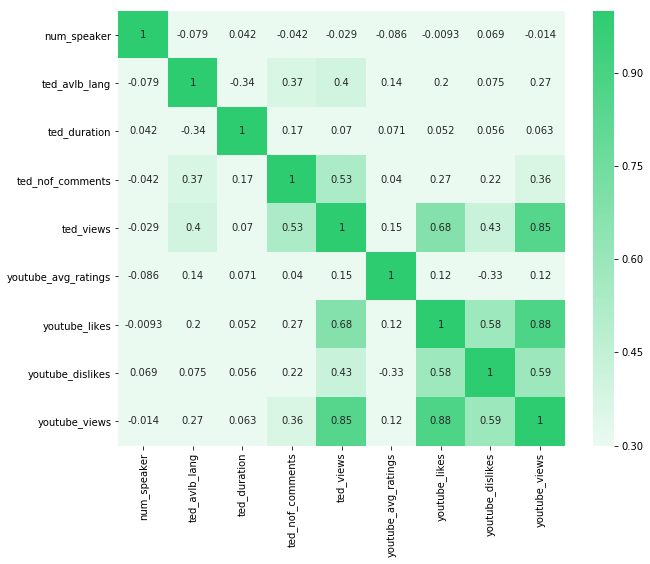

In [14]:
plt.figure(figsize = (10,8))
cmap = sns.light_palette("#2ecc71", as_cmap=True)
#cmap = sns.light_palette("#2ecc71", as_cmap=True)
sns.heatmap(data1[['num_speaker','ted_avlb_lang','ted_duration','ted_nof_comments','ted_views',
                'youtube_avg_ratings','youtube_likes','youtube_dislikes','youtube_views']].corr(),annot=True,vmin=0.3,cmap=cmap)

> Heatmap is used to find correlations between the numerical variables in Dataframe
*  __Youtube Likes are highly correlated with YouTube Views and TED views__
*  Talks available in several __languages__ show little edge in __number of views__
*  Number of speaker is not correlated with any other variables.

## TED Talks growth over years

C:\Users\Sivakumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Sivakumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[Text(0,0,'2001'),
 Text(0,0,'2002'),
 Text(0,0,'2003'),
 Text(0,0,'2004'),
 Text(0,0,'2005'),
 Text(0,0,'2006'),
 Text(0,0,'2007'),
 Text(0,0,'2008'),
 Text(0,0,'2009'),
 Text(0,0,'2010'),
 Text(0,0,'2011'),
 Text(0,0,'2012'),
 Text(0,0,'2013'),
 Text(0,0,'2014'),
 Text(0,0,'2015'),
 Text(0,0,'2016'),
 Text(0,0,'2017')]

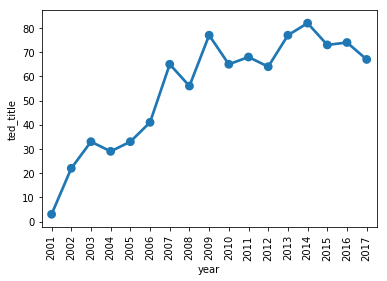

In [15]:
ted = data1[data1['ted_event'].str.contains('TED20')]
ted['year']=ted['ted_event'].str.strip('TED')
ted['year']=ted['year'].astype(int)
ted_title_count = ted.groupby('year')['ted_title'].count().to_frame().reset_index()

plt.xlim(2001,2020)
g = sns.pointplot(x='year',y='ted_title',data=ted_title_count)
g.set_xticklabels(g.get_xticklabels(), rotation=90)



> The above plot depicts the title count for all the TED talks till 2017. Other TED events like TEDGlobal and TEDx are not included.
*  __Number of talks was increased steadily from 2001 to 2007__,after that number of talks remain between 60 - 80.

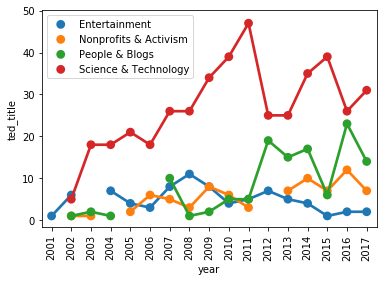

In [16]:
h = ted.groupby(['year','youtube_categories'])['ted_title'].count().to_frame().reset_index()
h['youtube_categories']=h.youtube_categories.str.replace('[','').str.replace(']','').str.replace("'",'')
ted_title_count_top_cat = h[h.youtube_categories.isin(['Nonprofits & Activism','Science & Technology','People & Blogs','Entertainment'])==True]


g = sns.pointplot(x='year',y='ted_title',hue='youtube_categories',data=ted_title_count_top_cat)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.legend(loc='upper left')

>  __Categories spread over years__
*  Considering youtube categories spread over the years of TED talk, __Science & Technology__ remains the top number of talks
*  In __TED 2011__ event __Science and Techonology talks are high__ but there is significant reduction in other categories.
*  On contrary __2012 and 2013__ have very less number of technology talks, but increase in __People & Blogs__ category

## Duration Matters

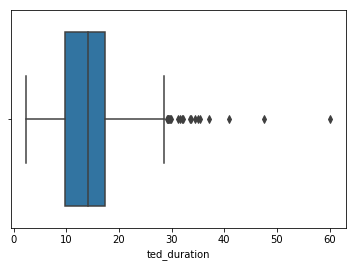

In [17]:
data1['ted_duration']= (data1['ted_duration']/60).round(decimals=2)
sns.boxplot(data1.ted_duration)

> Most of the TED talk duration are between 9 minutes to 18 minutes.

## Top speaker occupation among Categories

Text(0.5,0,'Nonprofits & Activism')

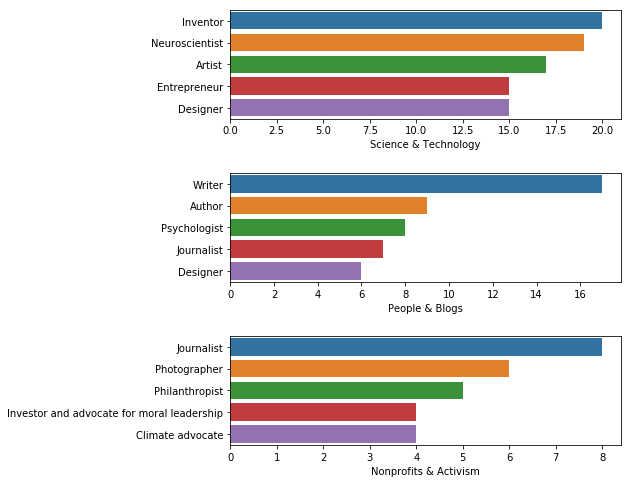

In [18]:
cat = data1.groupby(['youtube_categories','speaker_occupation'])['ted_title'].count().sort_values().to_frame().reset_index()
cat['youtube_categories'] =cat['youtube_categories'].str.replace('[','').str.replace(']','').str.replace("'",'').str.strip()
cat1 = cat[cat['youtube_categories'].isin(['Science & Technology','People & Blogs','Nonprofits & Activism'])==True]
cat2 = cat1.sort_values(['youtube_categories','ted_title'],ascending=False).groupby('youtube_categories').head(5)

fig, ax = plt.subplots(figsize=(7,8),ncols=1,nrows=3)
plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 0.5)


g=sns.barplot(y='speaker_occupation',x='ted_title',data=cat2[cat2.youtube_categories=='Science & Technology'],ax=ax[0])
g.set_ylabel('')
g.set_xlabel('Science & Technology')

g=sns.barplot(y='speaker_occupation',x='ted_title',data=cat2[cat2.youtube_categories=='People & Blogs'],ax=ax[1])
g.set_ylabel('')
g.set_xlabel('People & Blogs')

g = sns.barplot(y='speaker_occupation',x='ted_title',data=cat2[cat2.youtube_categories=='Nonprofits & Activism'],ax=ax[2])
g.set_ylabel('')
g.set_xlabel('Nonprofits & Activism')


> Among the top Categories we explored different speaker occupations
*  __Inventor__ tops in __Science & Technology__ Category,without any surprise __Writers tops People & Blogs__. Who can talk well on __Activism is our Jouranlist__ and about __Non-profits is Philantropists__.

## Great response for TED Women

In [19]:
data1[data1['ted_event'].str.contains('Women')].groupby('ted_event')['ted_title'].count()

ted_event
TEDWomen 2010        31
TEDWomen 2013         9
TEDWomen 2015        28
TEDWomen 2016        25
TEDxColumbusWomen     1
TEDxFiDiWomen         1
TEDxGatewayWomen      1
TEDxWomen 2011        6
TEDxWomen 2012        6
Name: ted_title, dtype: int64

> As TEDx events are independent event can be organized by anyone, we are considering only the main TEDWomen events

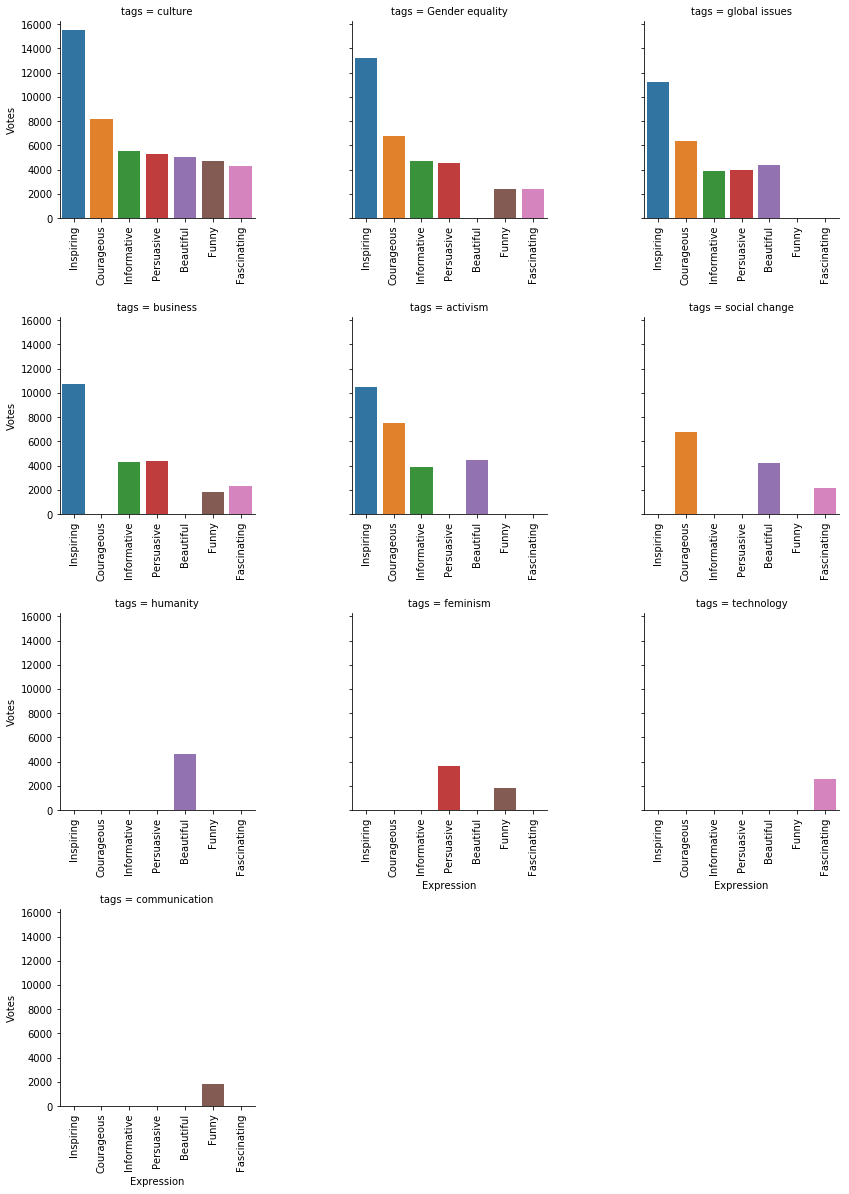

In [20]:
ted_women = data1[data1['ted_event'].str.contains('TEDWomen')]
tag_women_merge  = pd.merge(ted_women,tags,left_on='ted_title',right_on='title_tags')
ratings_tag_women =  pd.merge(tag_women_merge,ratings,left_on='ted_title',right_on='Talk')

v = tag_women_merge.groupby(['tags'])['ted_title'].count().sort_values(ascending=False).to_frame().reset_index()
v = v[v['ted_title']>10]

k = ratings_tag_women[ratings_tag_women['tags'].isin(v.tags)==True].groupby(['tags','Expression'])['Votes'].sum().sort_values(ascending=False).to_frame().reset_index()


k = k[k['Expression'].isin(['Inspiring', 'Courageous', 'Informative', 'Beautiful',
       'Persuasive', 'Funny', 'Fascinating'])==True]
k= k[k.tags !='women']


top_tag_ratings = k.sort_values(by='Votes',ascending=False).groupby('Expression').head(5)

g= sns.factorplot(x='Expression',y='Votes',col='tags',data=top_tag_ratings,kind='bar',col_wrap=3,sharex=False)
plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 0.5)

for ax in g.axes:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

> Considering top tags and analysing the ratings of each 
*  As most of the Women expects inspirational and bold Women leaders as their role models,it is very clear from above in all the tags Inspiration and Courage remains the top ratings.
*  This is TEDWomen talk so we ignored the tag 'Women' as it will occur in all these talks

1490984.5913978494

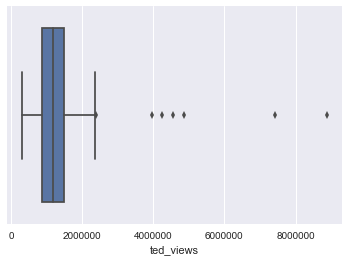

In [21]:
sns.set()
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)

sns.boxplot(ted_women.ted_views)
ted_women.ted_views.mean()

> The distribution on TED Women views are shown above
*  Most of the TED Women talks have 1 Million to 1.8 Million. The range is pretty good as the count of views is consistent among all the talks.

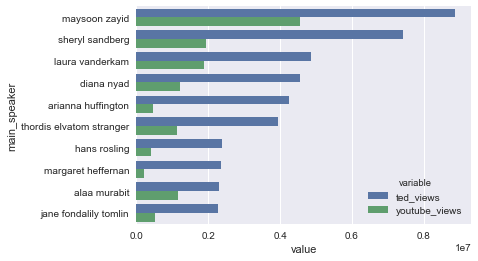

In [22]:
top_women_speakers =ted_women[['main_speaker','speaker_occupation','ted_title','ted_views','youtube_views']].sort_values(['ted_views','youtube_views'],ascending=False).head(10)

top_women_speakers =pd.melt(top_women_speakers,id_vars=['main_speaker','speaker_occupation','ted_title'],value_vars=['ted_views','youtube_views'])

sns.barplot(y='main_speaker',x='value',hue='variable',data=top_women_speakers)

> Top 10 Speakers of TEDWomen are shown above
*  __Maysoon Zayid,Sheryl Sandberg,Laura Vanderkam and Diana Nyad are the top speakers both in TED.com and Youtube__. These are the top talks overall.
*  Interstingly fact is that usually from our above plot usually __Youtube have more views that TED.com, but for TEDWomen talks TED.com have more views that Youtube.__
*  Youtube have only __half the views__ as compared to TED.com

In [23]:
ted_women.groupby('youtube_categories')['ted_title'].count().sort_values(ascending=False)

youtube_categories
['Science & Technology']     30
['Nonprofits & Activism']    25
['People & Blogs']           23
['News & Politics']           4
['Sports']                    2
['Music']                     2
['Howto & Style']             2
['Education']                 2
['Travel & Events']           1
['Entertainment']             1
['Comedy']                    1
Name: ted_title, dtype: int64

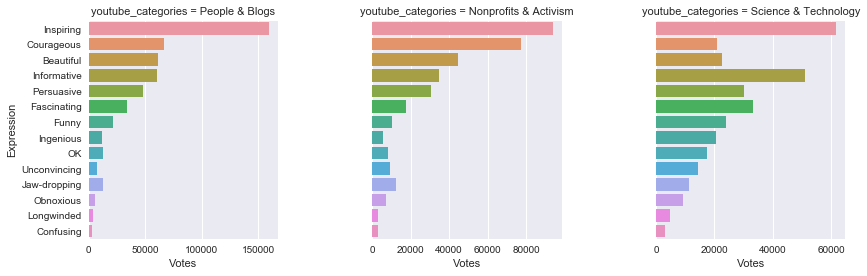

In [24]:
ratings_tag_women['youtube_categories']=ratings_tag_women['youtube_categories'].str.replace('[','').str.replace(']','').str.replace("'",'')
categories_votes = ratings_tag_women[ratings_tag_women['youtube_categories'].isin(['Science & Technology','Nonprofits & Activism','People & Blogs'])==True].groupby(['youtube_categories','Expression'])['Votes'].sum().sort_values(ascending=False).to_frame().reset_index()

categories_votes = categories_votes.sort_values(by='Votes',ascending=False).groupby('Expression').head(5)

g= sns.factorplot(y='Expression',x='Votes',col='youtube_categories',data=categories_votes,kind='bar',col_wrap=3,sharex=False)
plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 0.5)


> Top 3 Categories are Science and Technology,Non-Profits & Activism and People & Blogs
*  Eventhough Science & Technology category have more talks, there are more __posive votes for People and Blogs Category.__
*  Most people felt the __Science & Technology category as Informative__ equivalent to Inspiring. __Negative expressions are greater for Science & technology category compared to other two categories__.
*  __People & Blogs have 23 talks lesser than other two but yet this category is clear winner.__
